# **Lab 1: Basic Audio Processing in Python**

Intagliata Emanuele (928166)

Surricchio Mattia (920715)

#**IMPORTANT: The first step is always to SAVE A COPY OF THIS NOTEBOOK in your own Google Drive and do the work on your own document.**  (File --> Save a copy in Drive)

Python is a general-purpose programming language that is popular and easy to use. For new programmers, it is a great choice as a first programming language. In fact, more and more university CS departments are centering their introductory courses around Python.


#### **The Python Tutorial**

If you are new to Python, you can follow this [Python Tutorial](https://docs.python.org/2/tutorial/index.html).

For the purposes of this course, be sure you understand the following sections:

Section 3: *An Informal Introduction to Python*

*   numbers: int, float
*   strings
*   lists

Section 4: *More Control Flow Tools*

*   if statements
*   for statements
*   range
*   functions

Section 5: *Data Structures*

*   list comprehensions
*   tuples
*   dictionaries
*   looping techniques


Other resources:

*   [The Hitchhiker's Guide to Python](http://docs.python-guide.org/en/latest/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [SciPy Lecture Notes](http://www.scipy-lectures.org/)
*   [learnpython.org](https://www.learnpython.org/)


### **Exercise 1**: Basic operations with arrays

Use numpy to do the following array operations:

Create a row vector v1: $[1,\, 2,\, 3]$

In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import librosa

In the following cell we're creating a simple array. It is important to add extra square brackets in its declaration. Declaring the array only as `np.array([1,2,3])` will generate an array with a single dimension: its shape will be `(3,)`. <br>This result will prevent us from any matrix computation, thus we're adding extra square brackets in order to obtain a vector with shape `(1,3)`, which is still one dimensional, but it's interpreted differently in Python with respect to `(3,)`

In [ ]:
import numpy as np

#Here i'm adding extra square brackets to create a 2D array and then use the transpose.
#Creating a standard array with np.array([1,2,3]) creates a 1D element which is not transposable with np.transpose()
v1 = np.array([[1,2,3]])
print("Array shape:",v1.shape)

Array shape: (1, 3)


Create a column vector v2:  $[1,\, 2,\, 3]^T$

We're applying the `transpose` function of `numpy` to our array.

In [ ]:
v2 = np.transpose(v1)
print("Array shape:",v2.shape)

Array shape: (3, 1)


Create a matrix M of 3 x 3 elements:

Now we're declaring a simple 3x3 matrix. The `array` function of `numpy` takes as input tuples of elements between square brackets, this represents the content of a row. Each row is splitted by a comma. 

In [ ]:
matrix = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(matrix)


[[1 2 3]
 [4 5 6]
 [7 8 9]]


Show the first row of M:

Now we're using array slicing to select a single row and then a single column. The `:` operator selects all the element in that dimension. 

In [ ]:
print(matrix[0,:])

[1 2 3]


Show the first column of M:

In [ ]:
print(matrix[:,0])

[1 4 7]


Perform the matrix product v2 times v1:

Performing the dot product between the 2 arrays using the `dot` function of `numpy`. Since `v1` has shape `(1,3)` and `v2` has shape `(3,1)` the dot product returns a single scalar value. <br> From the theory, given a matrix of NxM and MxN, the result shape of the dot product between these two matrices is a NxN matrix. 

In [ ]:
result = v1.dot(v2)
print(result)

[[14]]


Perform the matrix product v2 times v1:

In [ ]:
result = v2.dot(v1)
print(result)

[[1 2 3]
 [2 4 6]
 [3 6 9]]


Perform the element-wise multiplication of v2 and v1, with result having the shape of v2:

We're performing di element-wise product using the `multiply` function of `numpy`. We're using `expand_dims()` in order to add an extra dimension to `result` and cast the array from `(3,) `shape to `(3,1)` shape

In [ ]:
result = np.multiply(v2[:,0],v1[0,:])
result = np.expand_dims(result, axis=1)
print('Result: ')
print(result)
print('The result has shape: ')
print(result.shape)

Result: 
[[1]
 [4]
 [9]]
The result has shape: 
(3, 1)


Perform the element-wise multiplication of v1 and v2, with result having the shape of v1:

Same process as the previous cell

In [ ]:
result = np.multiply(v2[:,0],v1[0,:])
result = np.expand_dims(result, axis=0)
print('Result: ')
print(result)
print('The result has shape: ')
print(result.shape)

Result: 
[[1 4 9]]
The result has shape: 
(1, 3)


Generate an array of 20 equally-spaced numbers between 0 and 10:

We're using the `linspace` function in order to generate 20 equally spaced elements between 0 and 10. The first two arguments select start and end of the space, the third one select the number of equally spaced elements in the given interval.

In [ ]:
lin_space = np.linspace(0, 10, num=20)
print(lin_space)

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]


Generate an array of numbers going from 0 to 1.5 in steps of 0.2:

Same thing as the previous cell, but the `arange` function takes as third argument the step size instead of the number of equally spaced elements inside the given range

In [ ]:
lin_space = np.arange(0,1.5,0.2)
print(lin_space)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4]


Generate an array of 13 logarithmically-spaced numbers between 1 and 2 (both included) using the numpy function logspace()

logspace is used to generate 13 elements in the given range.` logspace(n,m,k) `returns a logspace between `base**n` and `base**m`. Since we're interested in a space between 1 and 2, we're adding `np.log10()`before the arguments.

printing values: [1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


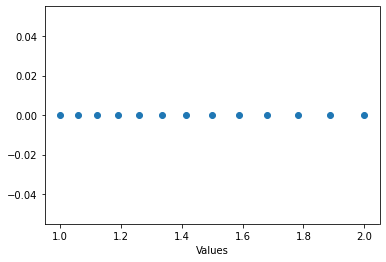

In [ ]:
log_space = np.logspace(np.log10(1), np.log10(2), num=13, base=10)
y = np.zeros(13)
print('printing values:',log_space)
plt.plot(log_space,y, 'o');
plt.xlabel('Values');

Generate the same array of 13 logarithmically-spaced numbers using fractional powers of 2:


printing values: [1.         1.05946309 1.12246205 1.18920712 1.25992105 1.33483985
 1.41421356 1.49830708 1.58740105 1.68179283 1.78179744 1.88774863
 2.        ]


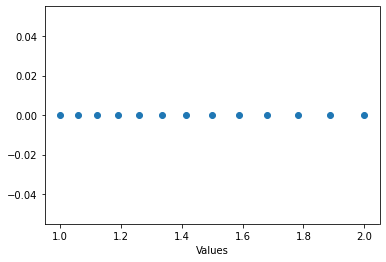

In [ ]:
log_space = np.logspace(np.log2(1), np.log2(2), num=13, base=2)
y = np.zeros(13)
print('printing values:',log_space)
plt.plot(log_space,y, 'o');
plt.xlabel('Values');

The generated array divides logarithmically an octave and can be used to generate fundamental frequencies for the pitches:

Index | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
Pitch | A | A# | B | C | C# | D | D# | E | F | F# | G | G# | A$_2$  



Use as a starting fundamental frequency, the one corresponding to A (440 Hz), and generate an array with the fundamental frequencies of each pitch:

In [ ]:
pitches = 440*log_space
print(pitches)

[440.         466.16376152 493.88330126 523.2511306  554.36526195
 587.32953583 622.25396744 659.25511383 698.45646287 739.98884542
 783.99087196 830.60939516 880.        ]


### **Exercise 2**: Generation of notes

Assume a sampling frequency of fs = 16000 Hz, and generate a time vector with sampling instants between 0 s and 2 s:

In [ ]:
fs=16000
time = np.arange(0,2,step=1/fs)
time.shape #checked array dimension, seems coherent

(32000,)

Generate an array containing the envelope shape:

\begin{equation}
  a(t) = Ae^{-t/\tau}
\end{equation}

with $\tau = 0.4$, $A=0.5$ and $t$ corresponding to a given time instant:

In [ ]:
tau = 0.4
A = 0.5
a = A*np.exp(-time/tau)
print(a.shape) 

(32000,)


Plot the envelope using Matplotlib:

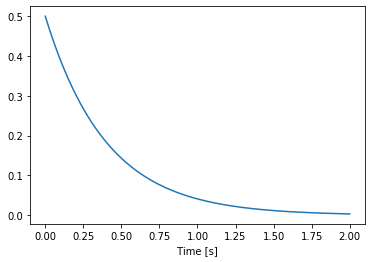

In [ ]:
import matplotlib.pyplot as plt

plt.plot(time,a);
plt.xlabel(' Time [s] ');


Generate a sawtooth wave by using scipy.signal to generates notes with the model

\begin{equation}
  x(t) = a(t) \textrm{sawtooth}(2\pi f_k t)
\end{equation}

where $a(t)$ is the envelope (see above) and $f_k$ the fundamental frequencies of the $k$-th pitch as in the table of Exercise 1.

Generate note signals for pitches A, C#, E and A$_2$:

The following cell simply generates 4 different notes using the `signal` function from `scipy`. The `sawtooth` is generated by passing the `frequency pitch`, the `time` axis and `2*pi`. Then the result is multiplied by the envelope `a`, which will change the amplitude of our wave

In [ ]:
from scipy import signal
notes = {}
A1_note = a*signal.sawtooth(2 * np.pi * pitches[0] * time)
print(A1_note.shape)
C_sharp_note = a*signal.sawtooth(2 * np.pi * pitches[4] * time)
E_note = a*signal.sawtooth(2 * np.pi * pitches[7] * time)
A2_note = a*signal.sawtooth(2 * np.pi * pitches[12] * time)

(32000,)


Listen to each of the notes by importing "IPython.display as ipd":

In [ ]:
import IPython

#solved the proble of multiple displays https://stackoverflow.com/questions/33048353/more-than-one-audio-object-in-a-jupyter-ipython-notebook-cell
IPython.display.display(IPython.display.Audio(A1_note,rate=fs))
IPython.display.display(IPython.display.Audio(C_sharp_note,rate=fs))
IPython.display.display(IPython.display.Audio(E_note,rate=fs))
IPython.display.display(IPython.display.Audio(A2_note,rate=fs))

Generate a vector arpegio by concatenating the four notes:

In [ ]:
arpeggio = np.concatenate((A1_note, C_sharp_note, E_note, A2_note))
IPython.display.display(IPython.display.Audio(arpeggio,rate=fs))

Generate a vector chord made by summing up the four notes and dividing
them by 4 to avoid clipping:

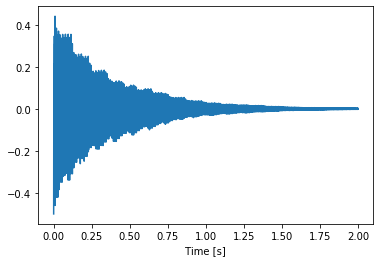

In [ ]:
temp_matrix = np.stack((A1_note, C_sharp_note, E_note, A2_note))
chord = temp_matrix.sum(axis=0)
chord = chord/4
plt.plot(time,chord)
plt.xlabel(' Time [s] ');
IPython.display.display(IPython.display.Audio(chord,rate=fs))

### **Exercise 3**: Linking Colab to Google Drive and Uploading files to Colab

To link your Google Drive to Colab, use the following commands and follow the instructions. You will have to go to the link to retrieve the authorization code.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


If you are able to access Google Drive, your google drive files should be all under: $/content/gdrive/My Drive/

You should now have access to any file in your Google Drive. Additionally, you can upload files to the Colab Running Environment by using the interface on the left side.

**Note:** The files uploaded to Colab (that are not within your Google Drive folder) will be deleted upon disconnection.

Upload the provided file 'OSR_us_000_0010_8k.wav' via any of the above methods (direct uploading or Google drive access):

### **Exercise 4**: STFT Representation

Now that the file has been uploded, read it with librosa.load, show its sampling rate and its duration.

In [ ]:
import librosa
import os

#----- Use this for local files (not on Colab)
#cwd = os.getcwd()
#file =  'OSR_us_000_0010_8k.wav' 
#path = os.path.join(cwd,file)
#-----

signal, sample_rate = librosa.load('/content/gdrive/My Drive/Lab 1 files/OSR_us_000_0010_8k.wav', sr=None)
print("Sampling rate:", sample_rate)
signal_length = signal.shape[-1]
print("Signal Length in seconds:",signal_length/sample_rate,"s")

Sampling rate: 8000
Signal Length in seconds: 33.623125 s


Cut the signal to show only the third spoken sentence (from t=7 s to t = 10 s). Represent it with respect to time in seconds.

The signal is cut between 7s and 10s. The seconds value is multiplied by `sample_rate` in order to get an array index for our signal vector.

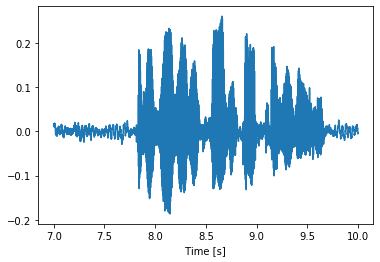

In [ ]:
cut_signal = signal[7*sample_rate:10*sample_rate]
time = np.arange(7,10,1/sample_rate)
plt.plot(time,cut_signal);
plt.xlabel(' Time [s] ');


Create a function "enframe" that takes as input:

*   signal (one-dimensional)
*   frame length (in samples)
*   hop size (in samples)

and returns a matrix where each column stores a frame of the signal. The function should pad the signal with zeroes if necessary.





In [ ]:
#Ask if we have to pass the cut signal or the complete one

def enframe(signal, frame_length, hop_size):
    signal_length = len(signal)
    #computes the number of frames generated with those inputs in my function
    num_frames = int(np.ceil((signal_length - frame_length)/hop_size)+1)
    #computes the length of the padded signal
    pad_signal_length = (num_frames-1)*hop_size + frame_length
    #generating a zero elements array as big as the difference between pad_signal_length and signal
    z = np.zeros((pad_signal_length - signal_length))
    #concatenate the padding
    padded_signal = np.append(signal,z)
    #first generates an array of elements from 0 to frame length with step = 1
    #then the tile function generates num_frame copies of this array and stacks them one on top of the other
    #for each column I have an index that goes from zero to frame length
    inframe_ind = np.tile(np.arange(0, frame_length), (num_frames,1)).T
    #Here it's the same as above, but in each row I have an array of values that goes 
    #from zero to num_frames*hop_size with  hop_size steps
    frame_ind = np.tile(np.arange(0, num_frames*hop_size, hop_size), (frame_length,1))
    #Here i get the full indexes matrix. Basically the main idea is to "split" the indexes in two different matrixes
    #inframe_ind is the relative indexing inside a single frame, so from 0 to frame_length
    #frame_ind is the starting point of the n-th frame. So summing relative index + frame starting point
    #i get an absolute index over the original samples of the signal
    indices = inframe_ind+frame_ind

    frames = padded_signal[indices]
    return frames



Divide the signal into frames of length 512, using a hop size of 256 samples. Show the dimensions of the output.

In [ ]:
frame_length = 512
hop_size = 256
output = enframe(cut_signal, frame_length, hop_size)
print(output.shape)

(512, 93)


Plot the content of the 10-th frame:

`output[:,10]` selects the 10 column. Then the time axis is generated by dividing the sample index by the `sample_rate`

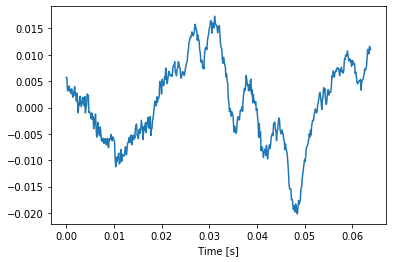

In [ ]:
#check if needed time x-axis or not 
plt.plot(np.arange(0,frame_length)*1/sample_rate,output[:,10]);
plt.xlabel(' Time [s] ');

Create a Hamming function and apply it to each of your frames:

In [ ]:
winfunc = np.hamming(frame_length)
winfunc = np.expand_dims(winfunc,1) #to obtain a column vector in order to perform column wise multiplication

windowed_signal = output*winfunc

Plot again the 10-th frame after having applied your Hamming window:

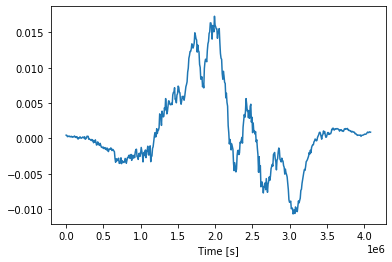

In [ ]:
plt.plot(np.arange(0,frame_length)*sample_rate,windowed_signal[:,10]);
plt.xlabel(' Time [s] ');

Compute the DFT of each column (frame) using numpy's rfft() function. Use as number of FFT points the same value as window length.

In [ ]:
NFFT = len(winfunc)

mag_frames = np.abs(np.fft.rfft(windowed_signal, NFFT, axis=0))
pow_frames = (mag_frames)**2
Nbins = mag_frames.shape[0]
f_bins = np.arange(0,Nbins)*sample_rate/NFFT

Use the following function to represent the result with the indices of each frame and each frequency bin in the horizontal and vertical axes, respectively.



In [ ]:
def show_specgram(X,ratio,limits,cmin):
  '''This function represents matrix X within a figure having the desired
  aspect ratio. Input:
  X: matrix to represent
  ratio: aspect ratio of axes
  limits: array with [xmin, xmax, ymax, ymin] (y axis is reversed)
  cmin: minimum value corresponding to the bottom of the colormap scale.
  '''
  w, h = plt.figaspect(ratio)
  fig = plt.figure(figsize=(w*2, h*2))
  ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
  im = ax.imshow(X, extent = limits, cmap='viridis', interpolation='none')
  xleft, xright = ax.get_xlim()
  ybottom, ytop = ax.get_ylim()
  ax.set_aspect(abs((xright-xleft)/(ybottom-ytop))*ratio)
  ax.invert_yaxis()
  if cmin != None:
    cbar = plt.colorbar(im);
    cbar.mappable.set_clim(cmin, None);
  return ax

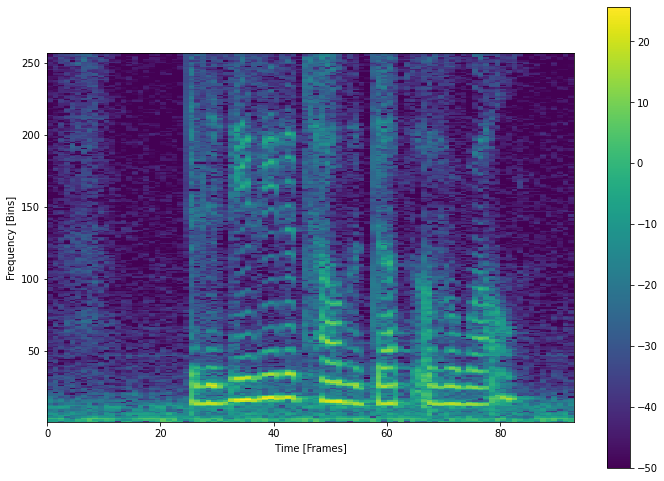

In [ ]:
show_specgram(10*np.log10(pow_frames), 0.7, [0, windowed_signal.shape[1], Nbins, 1], -50);
plt.xlabel(' Time [Frames] ');
plt.ylabel(' Frequency [Bins] ');

Finally, represent again the spectrogram but as a function of the time in seconds and frequency in Hz.

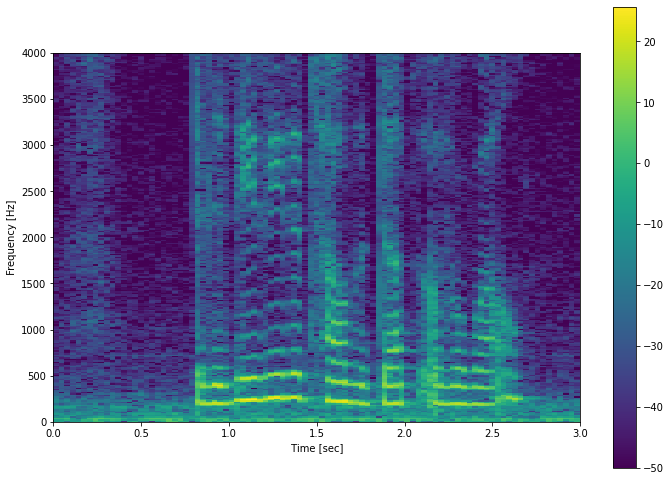

In [ ]:
show_specgram(10*np.log10(pow_frames), 0.7, [0, 3, f_bins[-1], 0], -50);
plt.xlabel(' Time [sec] ');
plt.ylabel(' Frequency [Hz] ');

### **Exercise 5**: Librosa representations (STFT)

Use librosa to represent the power spectrogram of the signal, as we computed manually in the last exercise.

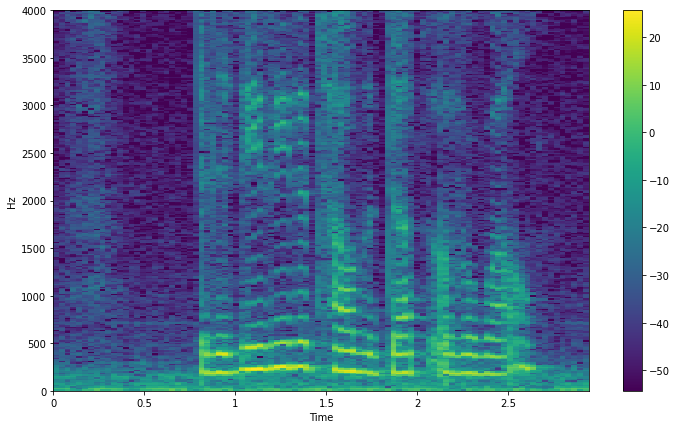

In [ ]:
import librosa.display
X = librosa.stft(cut_signal, n_fft = NFFT, hop_length = hop_size, win_length=frame_length, window='hamming', center = False)
Xmag = librosa.amplitude_to_db(np.abs(X))
plt.figure(figsize=(12,7))
librosa.display.specshow(Xmag, sr =sample_rate, hop_length=hop_size, x_axis = 'time', y_axis = 'linear', cmap = 'viridis' )
plt.colorbar();

Experiment with different values of frame length and hop size and discuss the results.

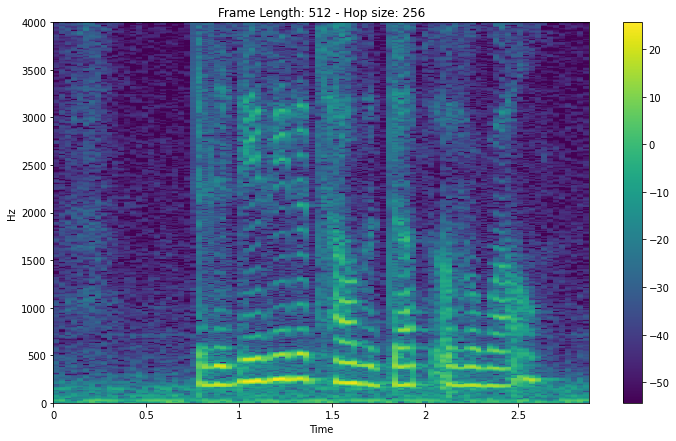

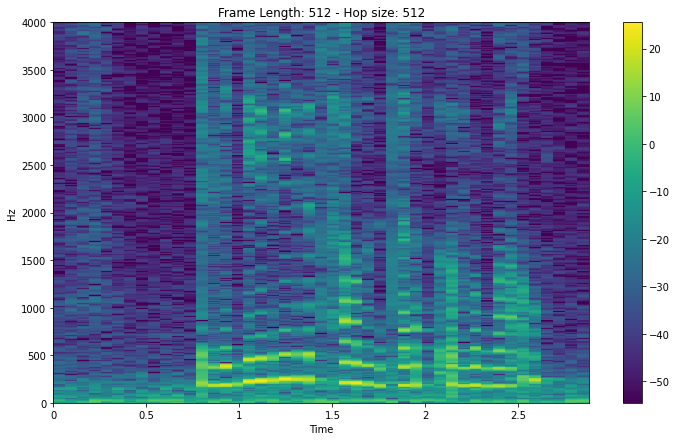

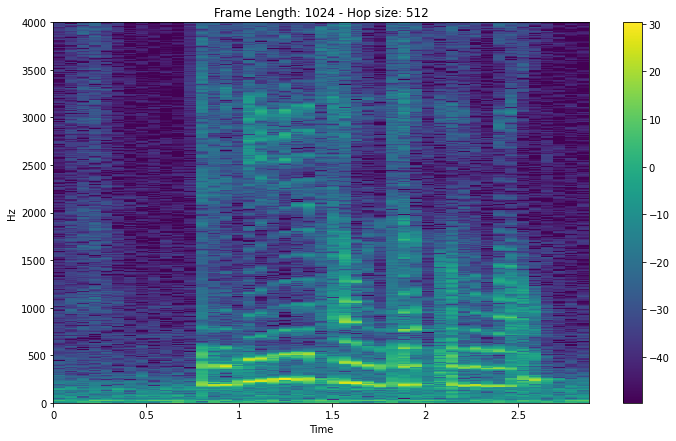

In [ ]:
import librosa.display
#changing the frame_length changes the resolution of the FFT (more bins)
#changing the hopsize changes the spatial resolution

frame_length_array = [512, 512, 1024]
hop_size_array = [256, 512, 512]

for i in range(0,3):
  X = librosa.stft(cut_signal, n_fft = 1024, hop_length = hop_size_array[i], win_length=frame_length_array[i], window='hamming', center = False)
  Xmag = librosa.amplitude_to_db(np.abs(X))
  plt.figure(figsize=(12,7))
  librosa.display.specshow(Xmag, sr=sample_rate, hop_length=hop_size_array[i], x_axis = 'time', y_axis = 'linear', cmap = 'viridis' );
  plt.colorbar();
  plt.title('Frame Length: {} - Hop size: {}'.format(frame_length_array[i], hop_size_array[i]))

*Changing the frame length changes the frequency resolution of the FFT (more bins). 
An higher frame length corresponds to a lower frequency resolution.
Changing the hopsize changes the temporal resolution. A bigger hop size corresponds to a lower temporal resolution.*

### **Exercise 6**: Mel-Spectrograms

Compute the mel spectrogram using librosa. Experiment with different values of the parameters and discuss the results.

In [ ]:
# First of all, I define some useful functions

# This converts a frequency from Hz to mels
def Hz_to_Mel(f_hz):
  return (2595 * np.log10(1 + (f_hz / 700)))

# This converts a frequency from mels to Hz
def Mel_to_Hz(f_mel):
  return (700 * (10**(f_mel / 2595) - 1 ))

# This function creates a filterbank
def Mel_filters(nfilt, f_min, f_max, numfft, Fs):
  low_freq_mel = Hz_to_Mel(f_min)
  high_freq_mel = Hz_to_Mel(f_max)

  mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2) #+2 because for n filters I need n+2 points
  hz_points = Mel_to_Hz(mel_points)
  bin = np.floor((numfft + 1) * hz_points / Fs) # corresponding bin in the DFT (NFTT points) for frequencies in hz_points

  # Inizialize filterbank
  fbank = np.zeros((nfilt,int(np.floor(numfft/2 +1))))
  for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m-1])
    f_m = int(bin[m])
    f_m_plus = int(bin[m+1])

    for k in range(f_m_minus, f_m):
      fbank[m - 1, k] = (k - f_m_minus) / (f_m - f_m_minus)

    for k in range(f_m, f_m_plus):
      fbank[m - 1, k] = (f_m_plus - k) / (f_m_plus - f_m)

  return fbank

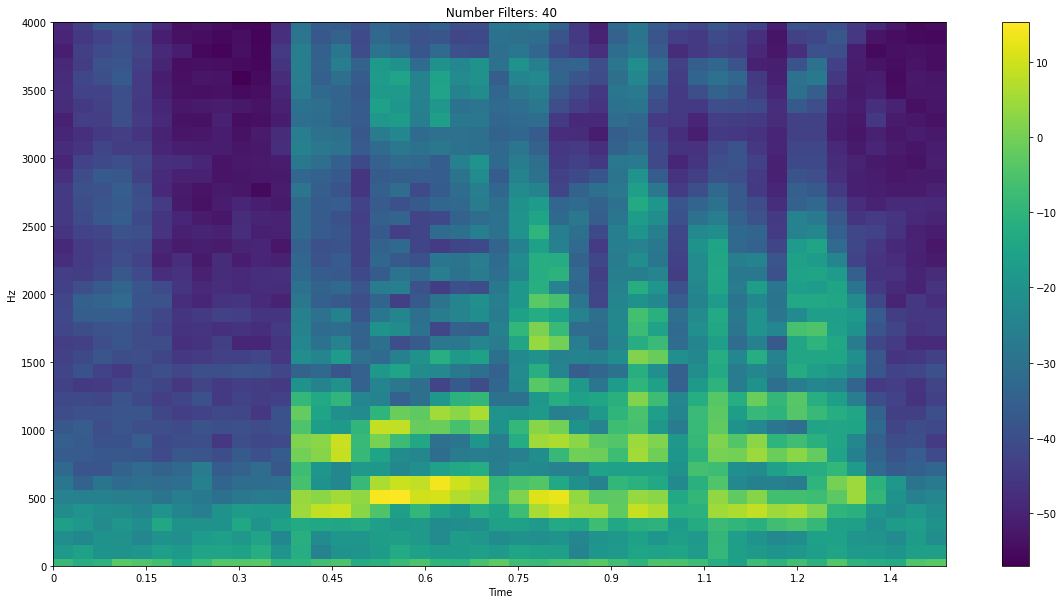

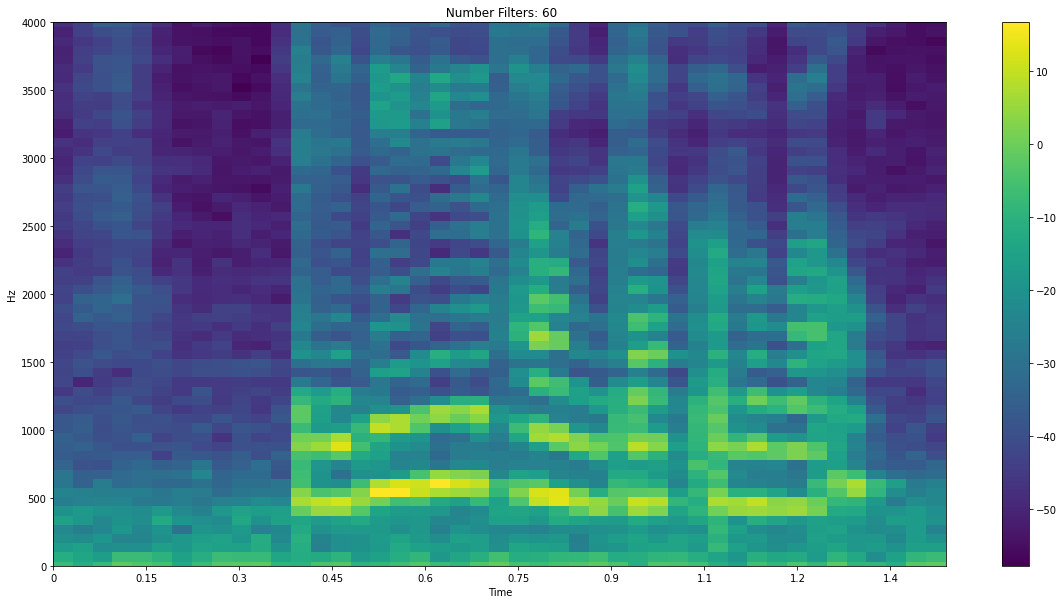

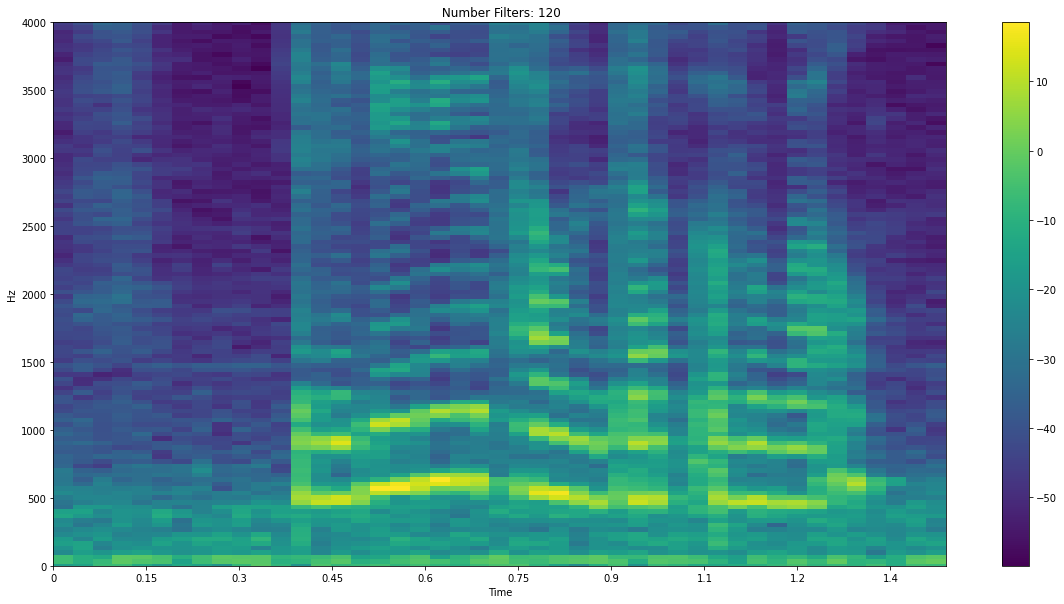

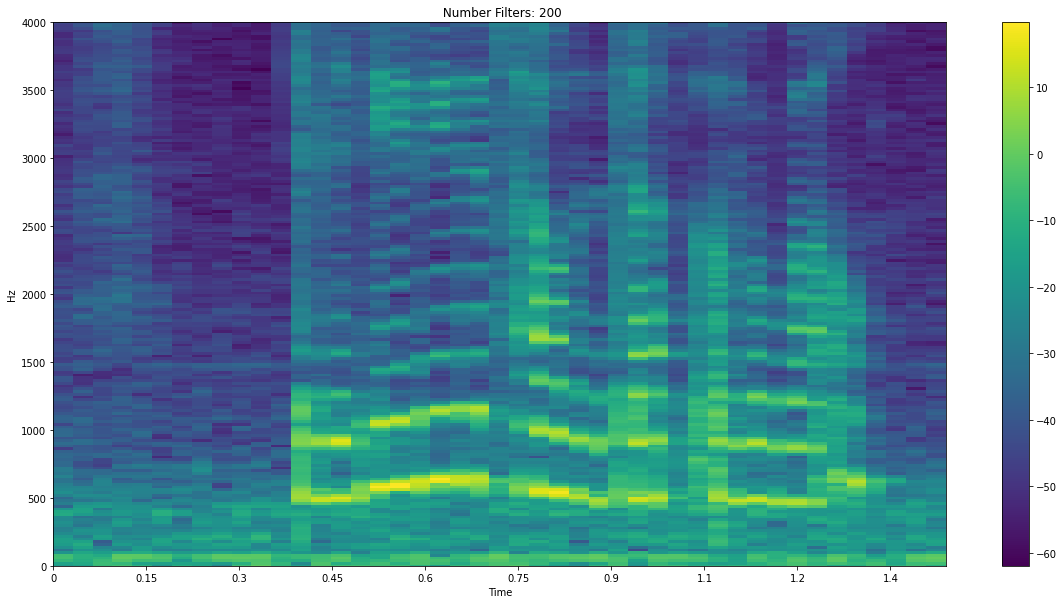

In [ ]:
nfilt_array = [40, 60 ,120, 200]
fmin = 0
fmax = sample_rate/2
fbank = Mel_filters(nfilt, fmin, fmax, NFFT, sample_rate)


for i in range (0,4):
  nfilt = nfilt_array[i]  
  # Let's compute the mel spectrogram (in librosa)
  X_mel_lib = librosa.feature.melspectrogram(sr=sample_rate, S=np.abs(X)**2, n_fft = NFFT, hop_length= hop_size, n_mels = nfilt, fmin = 0, fmax= sample_rate/2, htk= True)

  # Plot
  plt.figure(figsize=(20,10));
  librosa.display.specshow(10*np.log10(X_mel_lib), sr=sample_rate, hop_length=hop_size, x_axis = 'time', y_axis = 'linear', cmap = 'viridis' );
  plt.colorbar()
  plt.title(' Number Filters: {}'.format(nfilt))

*Changing the number of filters changes the frequency resolution of the FFT (more bins). An higher number of filters corresponds to a lower frequency resolution.*

Show the Mel-scale filterbank used in your last representation:

Text(0.5, 1.0, 'Mel filters')

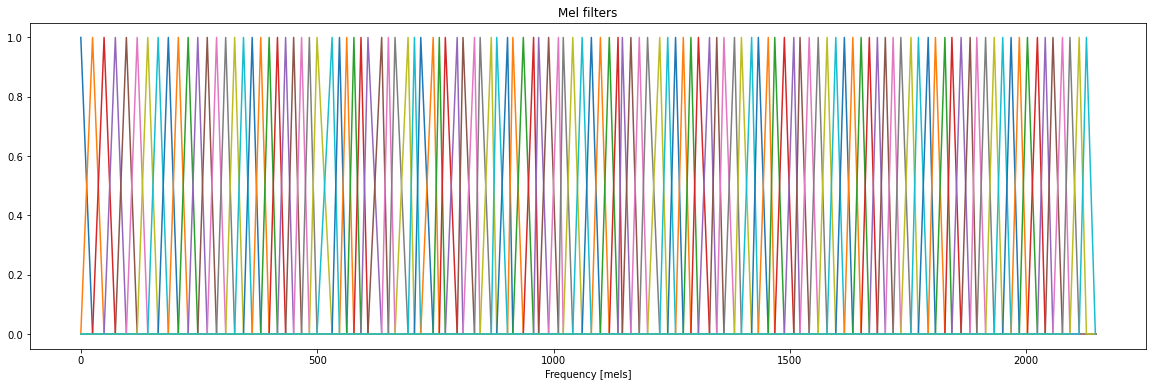

In [ ]:
plt.figure(figsize=(20,6));
plt.plot(Hz_to_Mel(f_bins), fbank.T)
plt.xlabel('Frequency [mels]')
plt.title('Mel filters')

Now perform a similar analysis with a music signal ("oboe_c6.wav").

---



Sample Rate:  22050


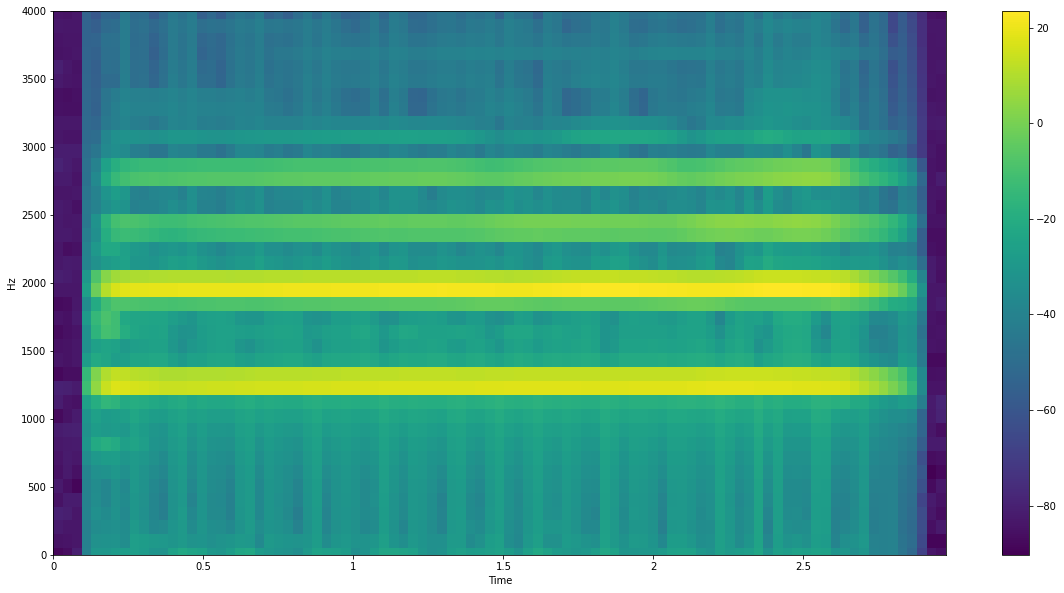

In [ ]:
# Imports
x, sr = librosa.load('/content/gdrive/My Drive/Lab 1 files/oboe_c6.wav', sr=None)
#ipd.Audio(x, rate= sr)
print('Sample Rate: ', sr)

# STFT
X = librosa.stft(x, n_fft=1024, hop_length= 256, win_length= 1024, window= 'hamming', center='False')
Xpow = np.abs(X)**2

# Let's compute the mel spectrogram (in librosa)
nfilt = 40
fmin = 1
fmax = sr/2
fbank2 = Mel_filters(nfilt, fmin, fmax, 1024, sr)

X_mel_lib = librosa.feature.melspectrogram(sr=sr, S=Xpow, n_fft = 1024, hop_length= 256, n_mels = nfilt, fmin = fmin, fmax= fmax, htk= True)

# Plot
plt.figure(figsize=(20,10));
librosa.display.specshow(10*np.log10(X_mel_lib), sr=sample_rate, hop_length=hop_size, x_axis = 'time', y_axis = 'linear', cmap = 'viridis' );
plt.colorbar();

### **Exercise 7**: Constant-Q Transform

Compute the constant Q transform using librosa. 
Experiment with different values of the parameters and discuss the results.

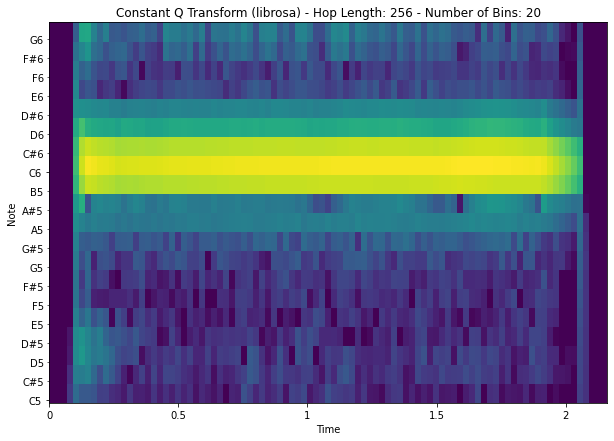

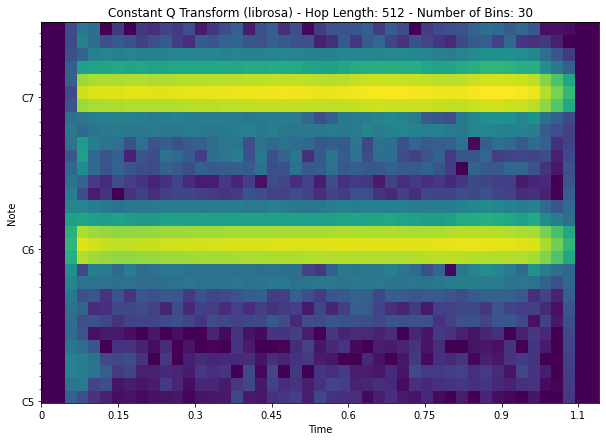

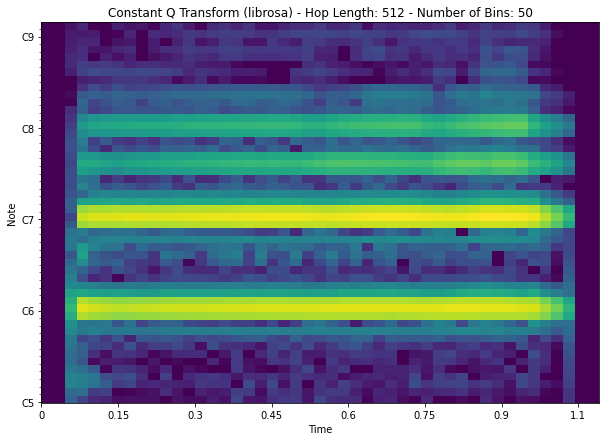

In [ ]:
fmin = librosa.midi_to_hz(72)
hop_length_array = [256, 512, 512]
n_bins_array = [20, 30, 50]

for i in range(0,3):
  hop_length = hop_length_array[i]
  n_bins = n_bins_array[i]

  C = librosa.cqt(x, sr=sr, fmin=fmin, n_bins = n_bins, hop_length=hop_length)
  logC = librosa.amplitude_to_db(np.abs(C))
  plt.figure(figsize=(10,7))
  librosa.display.specshow(logC, sr = sr, x_axis='time', y_axis='cqt_note', fmin = fmin , cmap='viridis' );
  plt.title('Constant Q Transform (librosa) - Hop Length: {} - Number of Bins: {}'.format(hop_length, n_bins));

Changing the **hopsize** changes the temporal resolution. A bigger hop size corresponds to a lower temporal resolution.

The parameter **nbins** corresponds to the number of frequency bins, starting at fmin (according to [librosa documentation](https://librosa.org/doc/latest/generated/librosa.cqt.html)).

Increasing the number of bins will result in an higher number of shown notes. In other words an higher number of bins allow us to see more high frequency harmonics.

### **Exercise 8**: MFCCs

Compute MFCCs using librosa. Experiment with different values of the parameters and discuss the results.

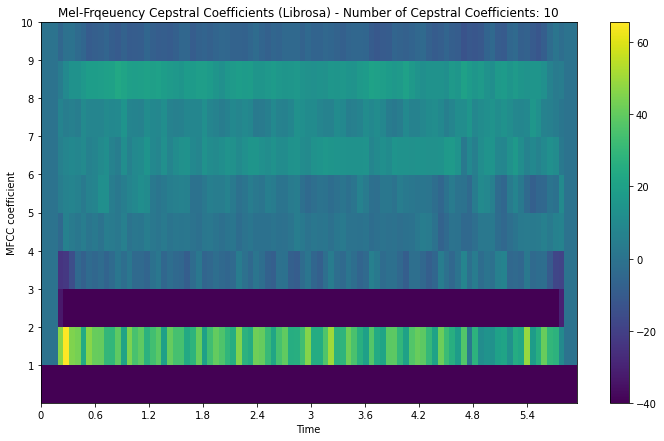

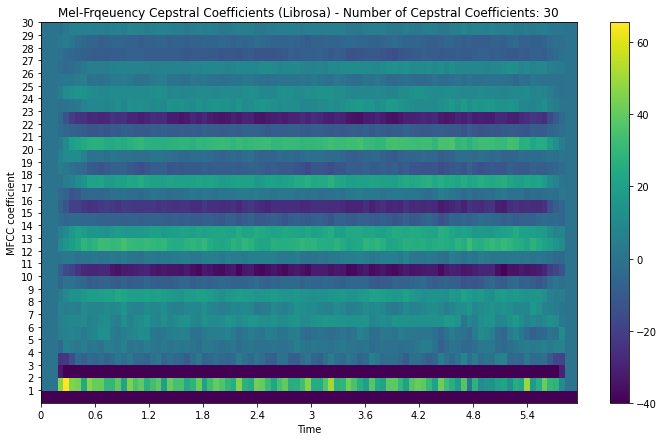

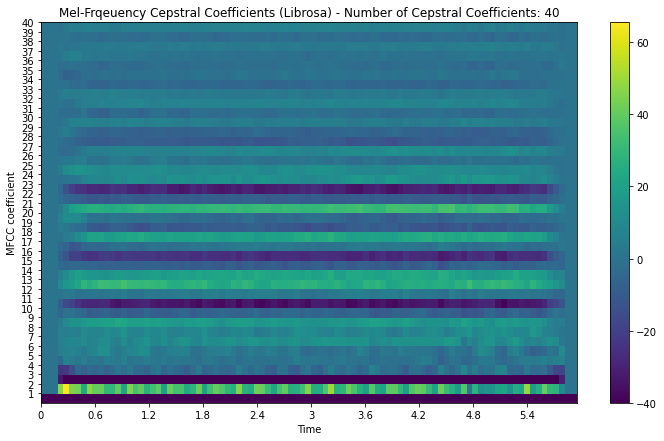

In [ ]:
num_ceps_array = [10, 30, 40]

for elm in num_ceps_array:
  num_ceps = elm;
  X_mfcc = librosa.feature.mfcc(S = librosa.power_to_db(X_mel_lib), sr = sample_rate, n_mfcc= num_ceps)

  plt.figure(figsize=(12, 7))
  librosa.display.specshow(X_mfcc, sr = sample_rate, hop_length = hop_length, x_axis='time', cmap='viridis');
  plt.ylabel('MFCC coefficient')
  plt.yticks(np.arange(1,num_ceps+1))
  plt.clim(-40, None);
  plt.colorbar();
  plt.title('Mel-Frqeuency Cepstral Coefficients (Librosa) - Number of Cepstral Coefficients: {}'.format(elm));

Increasing the **Number of cepstral coefficients** increases the number of MFCCs to return.

Increasing the **Number of cepstral coefficients** does not increase the frequency resolution.

Changing the hopsize changes the temporal resolution. A bigger hop size corresponds to a lower temporal resolution.